In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)

In [41]:
# import data
df = pd.read_csv("data/raw/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [36]:
df.isnull().sum().sort_values(ascending=False).head(10)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
dtype: int64

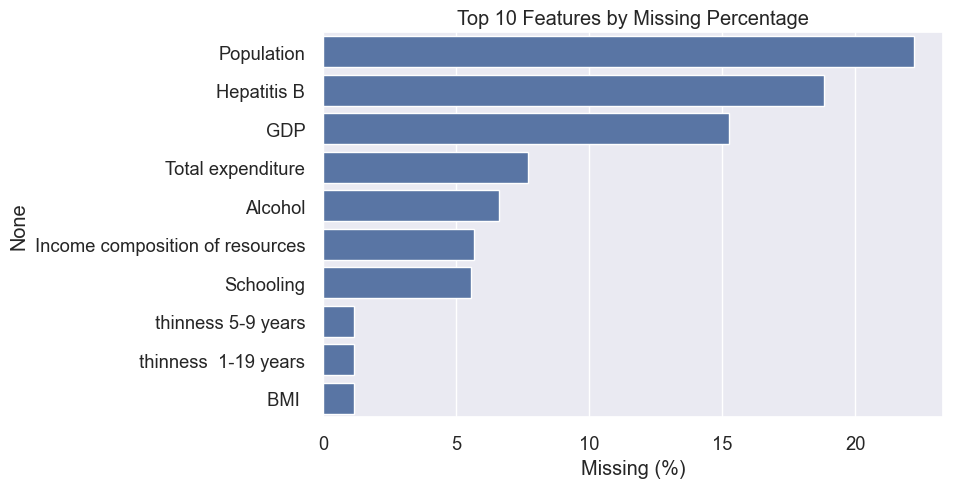

In [34]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=missing_ratio[:10]*100, y=missing_ratio.index[:10])
plt.title("Top 10 Features by Missing Percentage")
plt.xlabel("Missing (%)")
plt.show()

<Figure size 800x500 with 0 Axes>

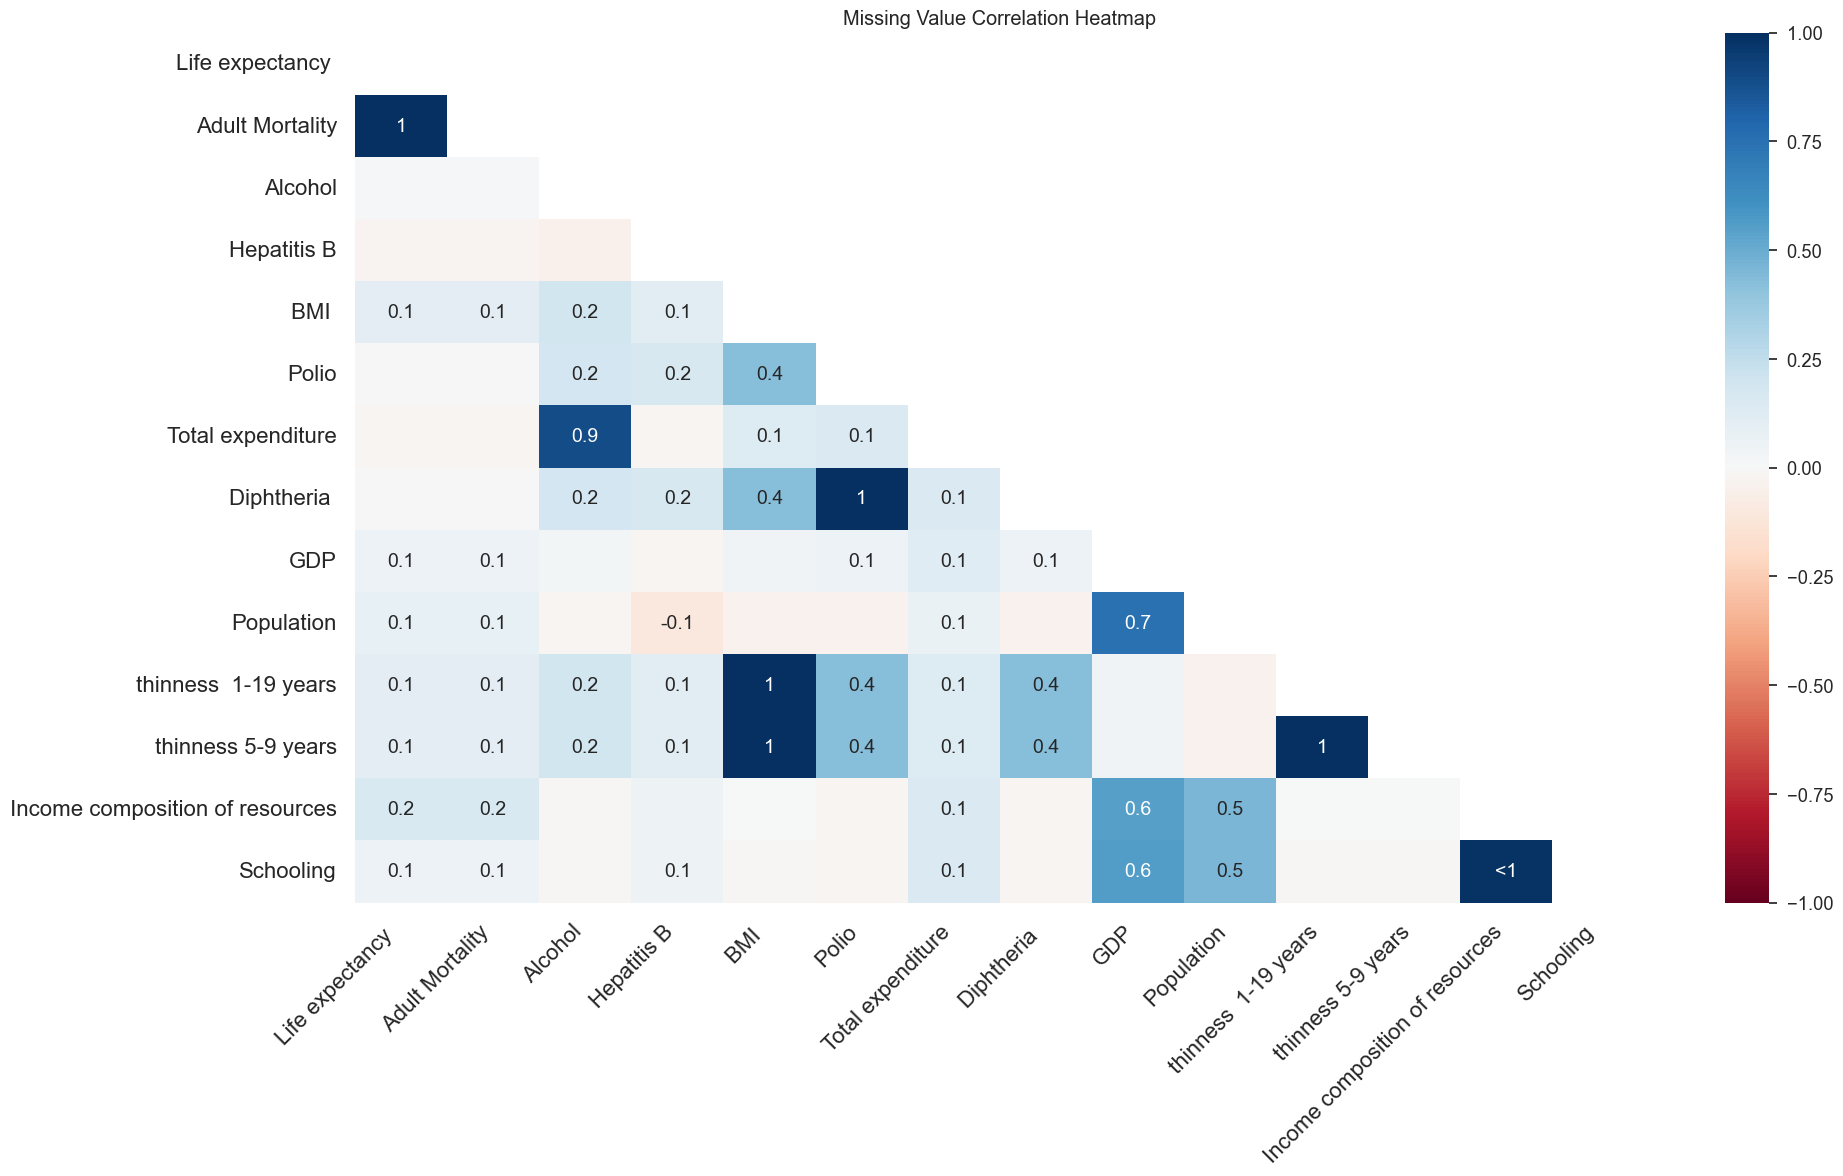

In [44]:
# missing data heatmap
plt.figure(figsize=(8,5))
msno.heatmap(df)
plt.title("Missing Value Correlation Heatmap")
plt.tight_layout()
plt.savefig("reports/figures/missing_heatmap.png", dpi=200, bbox_inches="tight")
plt.show()

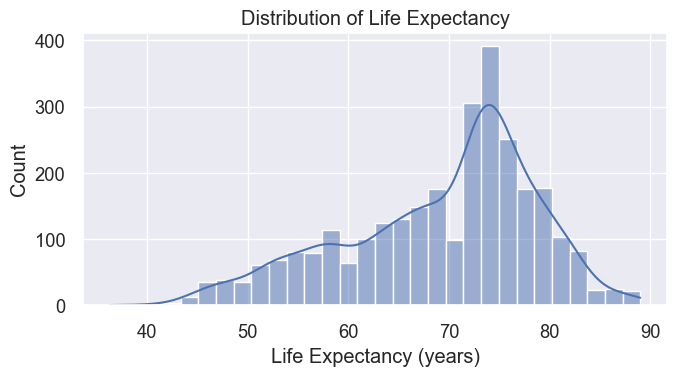

In [45]:
# distribution of life expectancy (target variable)
plt.figure(figsize=(7,4))
sns.histplot(df['Life expectancy '].dropna(), bins=30, kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("reports/figures/lifeexp_distribution.png", dpi=200, bbox_inches="tight")
plt.show()

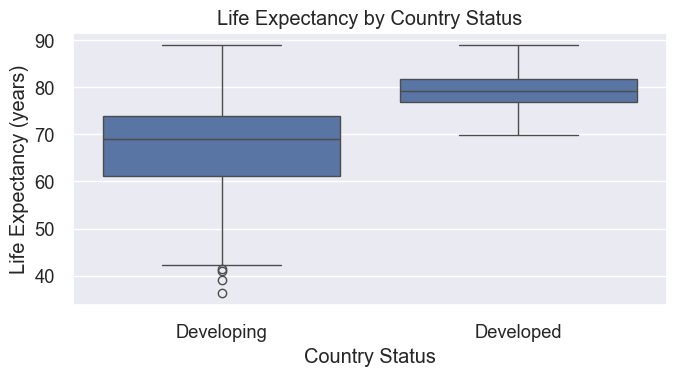

In [46]:
# life expectancy by country status
plt.figure(figsize=(7,4))
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title("Life Expectancy by Country Status")
plt.xlabel("Country Status")
plt.ylabel("Life Expectancy (years)")
plt.tight_layout()
plt.savefig("reports/figures/lifeexp_by_status.png", dpi=200, bbox_inches="tight")
plt.show()

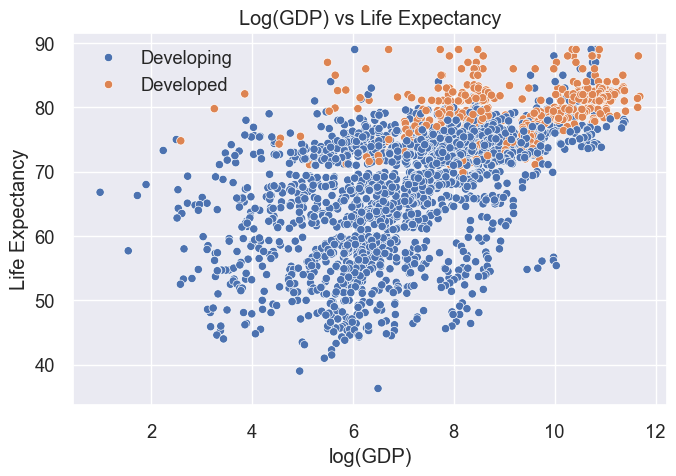

In [47]:
# GDP vs life expectancy
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=np.log1p(df['GDP']),
    y=df['Life expectancy '],
    hue=df['Status']
)
plt.title("Log(GDP) vs Life Expectancy")
plt.xlabel("log(GDP)")
plt.ylabel("Life Expectancy")
plt.legend()
plt.tight_layout()
plt.savefig("reports/figures/lifeexp_vs_gdp.png", dpi=200, bbox_inches="tight")
plt.show()

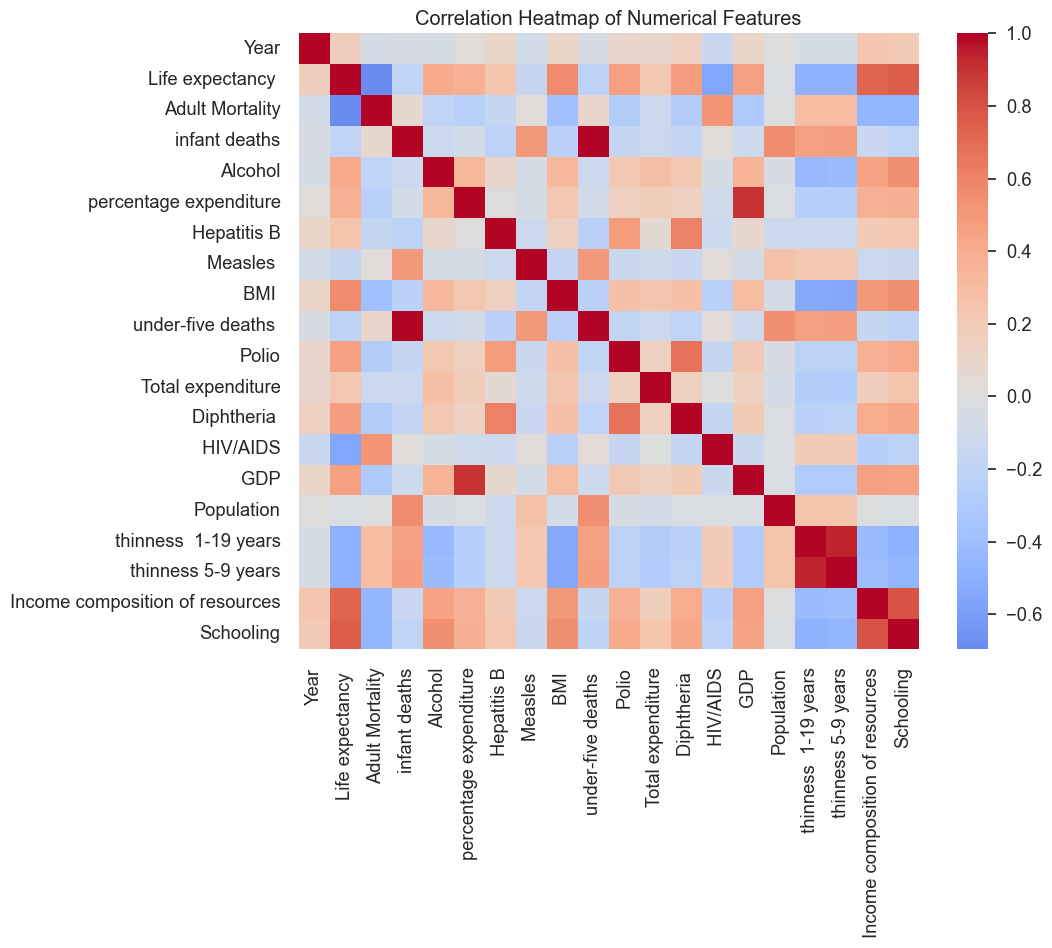

In [38]:
# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# top correlated features
corr = df.corr(numeric_only=True)['Life expectancy '].sort_values(ascending=False)
corr.head(10)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Name: Life expectancy , dtype: float64

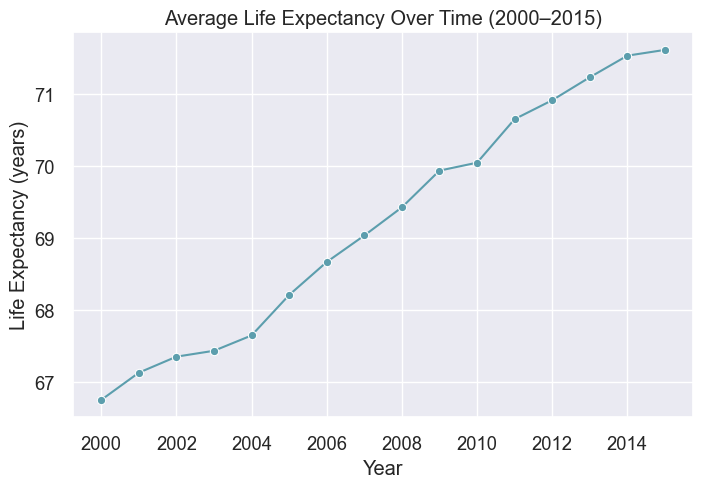

In [39]:
# life expectancy over time
yearly = df.groupby("Year")["Life expectancy "].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly, x="Year", y="Life expectancy ", marker="o", color="#5C9EAD")
plt.title("Average Life Expectancy Over Time (2000–2015)")
plt.ylabel("Life Expectancy (years)")
plt.show()